In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np


In [2]:
# Load the excel file
file_path = 'Nabers_book.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Plotting the data to visualize relationships
#sns.pairplot(df, x_vars=['Floor (m2)', 'Hours'], y_vars='Target Max Electricity kWh per anum', hue='Star Rating', height=5, aspect=1)
#plt.show()

# Prepare the data for modeling
X = df[['Floor (m2)', 'Hours', 'Star Rating']]
y = df['Target Max Electricity kWh per anum']

# Fit a polynomial regression model to capture non-linear relationships
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

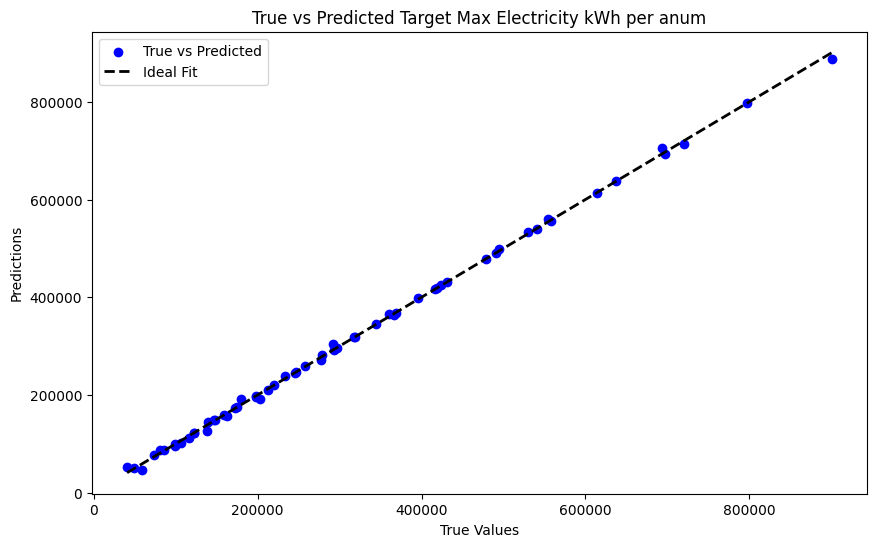

Target Max Electricity kWh per anum for 4000 m2 star rating 4 and 55 hours: 371076.92


c:\Users\ashut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [3]:
# Predict the target values
y_pred = polyreg.predict(X)

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c='blue', marker='o', label='True vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Target Max Electricity kWh per anum')
plt.legend(loc='best')
plt.show()

# Function to calculate Target Max Electricity kWh per anum
def calculate_target_max_electricity(floor_m2, hours, star_rate):
    return polyreg.predict(np.array([[floor_m2, hours, star_rate]]))[0]

# Example usage of the function
floor_m2 = 4000
hours = 55
star_rate = 4
target_max_electricity = calculate_target_max_electricity(floor_m2, hours, star_rate)
print(f'Target Max Electricity kWh per anum for {floor_m2} m2 star rating {star_rate} and {hours} hours: {target_max_electricity:.2f}')


In [10]:
#Failing model at most cases..
file_path = 'Nabers_book.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

#df['Target Max Electricity kWh per annum'] = df['Target Max Electricity kWh per annum'] * 12

# Function to calculate Target Max Electricity kWh per annum
def calculate_target_max_electricity(floor_area, hours, star_rating):
    X = df[['Floor (m2)', 'Hours', 'Star Rating']]
    y = df['Target Max Electricity kWh per anum']
    
    model = LinearRegression().fit(X, y)
    
    return model.predict([[floor_area, hours, star_rating]])[0]




# Example calculation for Floor Area: 6000 m2, Hours: 40, and Star Rating: 5
print("\nExample calculation:")
print(f"The Target Max Electricity kWh per annum is {calculate_target_max_electricity(4000, 45, 4):.0f} kWh")


Example calculation:
The Target Max Electricity kWh per annum is 340640 kWh


c:\Users\ashut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
#Choosing the best model to predict the values of Nabers


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the excel file
file_path = 'Nabers_book.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter the dataset for 5 star rating
df_5_star = df[df['Star Rating'] == 5]

# Prepare the data
X = df_5_star[['Floor (m2)', 'Hours', 'Star Rating']]
y = df_5_star['Target Max Electricity kWh per anum']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(2), LinearRegression())
}

# Dictionary to store the R-squared scores of each model
scores = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores[name] = score
    print(f"{name} R-squared: {score:.4f}")

# Find the best model
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]

print(f"\nBest model: {best_model_name} with R-squared: {scores[best_model_name]:.4f}")

# Train the best model on the full dataset
best_model.fit(X, y)


# Function to calculate Target Max Electricity kWh per anum
def calculate_target_max_electricity(floor_m2, hours, star_rate):
    return best_model.predict(np.array([[floor_m2, hours, star_rate]]))[0]

# Example usage of the function
floor_m2 = 4000
hours = 55
star_rate = 4
target_max_electricity = calculate_target_max_electricity(floor_m2, hours, star_rate)
print(f'Target Max Electricity kWh per anum for {floor_m2} m2 star rating {star_rate} and {hours} hours: {target_max_electricity:.2f}')


Linear Regression R-squared: 0.9652
Ridge Regression R-squared: 0.9652
Lasso Regression R-squared: 0.9652
Random Forest R-squared: 0.9485
Polynomial Regression R-squared: 1.0000

Best model: Polynomial Regression with R-squared: 1.0000
Target Max Electricity kWh per anum for 4000 m2 star rating 4 and 55 hours: 211556.92


c:\Users\ashut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
